<a href="https://pt.wikipedia.org/wiki/Lima"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Lima_-_Per%C3%BA.jpg/840px-Lima_-_Per%C3%BA.jpg" width = 800> </a>

# Analysing Business Opportunities in Lima districts

## 1.	Introduction

### 1.1.	Background

Lima, capital city of Peru, is one of the largest cities in Latam with outstanding growing in the recent years. Peru has constantly maintained its macroeconomics indicators healthy. Its major indicators such as GDP, employment and inflation have shown good performance and have been stable. Due to that stability, there is an expecting increase of entrepreneurs who are looking for business opportunities. The whole market, mainly in Lima, is providing hopeful signs (growing demand for goods and services, exchange trade controlled, and lower barriers for entrance) which should be consider to invest in a new entrepreneurship.     

### 1.2.	Problem

Considering that Peru is a developing country in which source of information in good quality is not developed and is not available for everyone, we have considered to work with the scarce data presented on websites. The following report not only would provide input information about what are businesses’ clustering segmentation in Lima but also would provide an important tool to identify if it is appropriate to start a new business in a determined geographical area based on competitor’s composition.  Finally, as an output of our analysis we can suggest a location to a new start-up company mainly related to its sector competitors.   

### 1.3.	Interest

Small entrepreneurs would be very interested in accurate prediction of the best location to start a new business, because with that information they will make more thoughtful decisions. Other stakeholders, such as retailers, banks and real estate companies will find this information useful. They can fit their market forecast to the cluster segmentation analysis provided in this report. 

## 2.	Data Preparation

### 2.1.	Extracting data

Im going to import first the libraries needed to work with data source. Then Im going to extract data from public website. After this, the required step is to extract the wikitable sortable.For this process we gonna use Beautiful soup application.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import requests

print('Libraries imported.')


Libraries imported.


In [2]:
lima_data = "https://es.wikipedia.org/wiki/Anexo:Distritos_de_Lima#Distritos_de_Lima"
lima_dataextracted = requests.get(lima_data).text

In [3]:
page=BeautifulSoup(lima_dataextracted,"html.parser")
page

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Anexo:Distritos de Lima - Wikipedia, la enciclopedia libre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgMonthNamesShort":["","ene","feb","mar","abr","may","jun","jul","ago","sep","oct","nov","dic"],"wgRequestId":"Xky@EwpAMFIAAJszifwAAAAT","wgCSPNonce":!1,"wgCanonicalNamespace":"Anexo","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":104,"wgPageName":"Anexo:Distritos_de_Lima","wgTitle":"Distritos de Lima","wgCurRevisionId":123662285,"wgRevisionId":123662285,"wgArticleId":5848401,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Distritos de Lima"

In [4]:
response_obj = requests.get(lima_data).text
soup = BeautifulSoup(response_obj,'lxml')
Districts_lima = soup.find('table',{'class':'wikitable sortable'})
Districts_lima

<table cellpadding="2px" class="wikitable sortable" style="background: #fff9090; border-width:1px; border-color: #lightgrey; text-align:center;">
<tbody><tr bgcolor="#ffffff" style="vertical-align:middle;">
<th><a class="mw-redirect" href="/wiki/Distritos_de_Per%C3%BA" title="Distritos de Perú">Distritos<br/></a>
</th>
<th><a href="/wiki/Ubigeo" title="Ubigeo">Ubigeo</a><br/>
</th>
<th>Área<br/>(km²)<br/>
</th>
<th>Población<br/>
</th>
<th>Densidad<br/>(/km²)<br/>
</th>
<th>Fundado en<br/>
</th>
<th><a class="new" href="/w/index.php?title=Lista_de_c%C3%B3digos_postales_en_el_Per%C3%BA&amp;action=edit&amp;redlink=1" title="Lista de códigos postales en el Perú (aún no redactado)">Código<br/>Postal<br/></a>
</th>
<th class="unsortable">Ubicación
</th></tr>
<tr bgcolor="#ffffe6">
<td align="center"><a href="/wiki/Distrito_de_Anc%C3%B3n" title="Distrito de Ancón">Ancón</a>
</td>
<td>150102
</td>
<td>299.22
</td>
<td>29419
</td>
<td>98.3
</td>
<td><span style="display:none">18741029</span> 2

we have just extracted all the data from website. then we are going to define our rows and columns.

In [5]:
totals=Districts_lima.find_all('tr')
nrows=len(totals)
nrows

44

In [6]:
header=totals[0].text.split()
header

['Distritos',
 'Ubigeo',
 'Área(km²)',
 'Población',
 'Densidad(/km²)',
 'Fundado',
 'en',
 'CódigoPostal',
 'Ubicación']

The following steps are useful to evaluate how will be presented our new dataframe. We gonna check the content of each row and define the columns needed.

In [7]:
totals[2].text

'\nAte Vitarte\n\n150103\n\n77.72\n\n419663\n\n5399.7\n\n18570102 2 de enero de 1857\n\n03\n\n\n'

In [8]:
totals[2].text.split('\n')

['',
 'Ate Vitarte',
 '',
 '150103',
 '',
 '77.72',
 '',
 '419663',
 '',
 '5399.7',
 '',
 '18570102 2 de enero de 1857',
 '',
 '03',
 '',
 '',
 '']

In [9]:
District=totals[1].text.split('\n')[1]
District

'Ancón'

In [10]:
records =[]
n=1
while n < nrows :
    Distritos=totals[n].text.split('\n')[1]
    drop1=totals[n].text.split('\n')[2]
    Ubigeo=totals[n].text.split('\n')[3]
    drop2=totals[n].text.split('\n')[4]
    Área=totals[n].text.split('\n')[5]
    drop3=totals[n].text.split('\n')[6]
    Población=totals[n].text.split('\n')[7]
    drop4=totals[n].text.split('\n')[9]
    Densidad=totals[n].text.split('\n')[8]
    drop5=totals[n].text.split('\n')[10]
    Fundado=totals[n].text.split('\n')[11]
    en=totals[n].text.split('\n')[12]
  
    records.append((Distritos,drop1,Ubigeo,drop2,Área,drop3,Población,drop4,Densidad,drop5,Fundado,en))
    n=n+1

df=pd.DataFrame(records, columns=["Distritos","drop1","Ubigeo","drop2","Área","drop3","Población","Densidad","drop4","drop5","Fundado","en"])
df.head(10)


,Distritos,drop1,Ubigeo,drop2,Área,drop3,Población,Densidad,drop4,drop5,Fundado,en
0,Ancón,,150102,,299.22,,29419,98.3,,,18741029 29 de octubre de 1874,
1,Ate Vitarte,,150103,,77.72,,419663,5399.7,,,18570102 2 de enero de 1857,
2,Barranco,,150104,,3.33,,45922,13790.4,,,18741026 26 de octubre de 1874,
3,Breña,,150105,,3.22,,94808,29443.5,,,19490715 15 de julio de 1949,
4,Carabayllo,,150106,,346.88,,188764,544.2,,,18210804 4 de agosto de 1821,
5,Chaclacayo,,150107,,39.5,,39686,1004.7,,,19400424 24 de abril de 1940,
6,Chorrillos,,150108,,38.94,,262595,6743.6,,,18570102 2 de enero de 1857,
7,Cieneguilla,,150109,,240.33,,15784,65.7,,,19700303 3 de marzo de 1970,
8,Comas,,150110,,48.75,,464745,9533.2,,,19611212 12 de diciembre de 1961,
9,El Agustino,,150111,,12.54,,165425,13 191.8,,,19650106 6 de enero de 1965,


We have realized that there are some columms tha we would not need. So we are going to drop some of them.

In [11]:
df.drop(['drop1','Ubigeo','drop2','drop3','drop4','drop5','Fundado','en'], axis=1, inplace= True)
df

,Distritos,Área,Población,Densidad
0,Ancón,299.22,29419,98.3
1,Ate Vitarte,77.72,419663,5399.7
2,Barranco,3.33,45922,13790.4
3,Breña,3.22,94808,29443.5
4,Carabayllo,346.88,188764,544.2
5,Chaclacayo,39.5,39686,1004.7
6,Chorrillos,38.94,262595,6743.6
7,Cieneguilla,240.33,15784,65.7
8,Comas,48.75,464745,9533.2
9,El Agustino,12.54,165425,13 191.8


In [12]:
df.size

172

In [13]:
df.dtypes
df.columns

Index(['Distritos', 'Área', 'Población', 'Densidad'], dtype='object')

In [14]:
df['Área']=df['Área'].astype(float)
df['Población']=df['Población'].astype(float)
df.dtypes

Distritos     object
Área         float64
Población    float64
Densidad      object
dtype: object

## 3.	Metodology

Part 1: we going to extract columns from our new df to plot bar charts. Those graphics will help us in identify which district is the most density and which one is the biggest (area). 

After plotting bar charts, we can analyze the graphics and evaluate if exist a correlation between those variables (density and  area).

In [15]:
!conda install -c anaconda xlrd --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-1.2.0                 |             py_0         108 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0      --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0 --> 2019.11.28-py36_0 anaconda
    openssl:         1.1.1d-h7b6447c_3 --> 1.1.1-h7b6447c_0  anaconda
    xlrd:            1.2.0-py_0       

In [16]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [17]:
df_gra = df.loc[:,'Distritos':'Área']
df_gra.head()

,Distritos,Área
0,Ancón,299.22
1,Ate Vitarte,77.72
2,Barranco,3.33
3,Breña,3.22
4,Carabayllo,346.88


In [18]:
df_gra.set_index('Distritos',inplace= True)
df_gra1=df_gra.sort_values('Área')
df_gra1.tail()

,Área
Distritos,
Lurín,181.12
Lurigancho,236.47
Cieneguilla,240.33
Ancón,299.22
Carabayllo,346.88


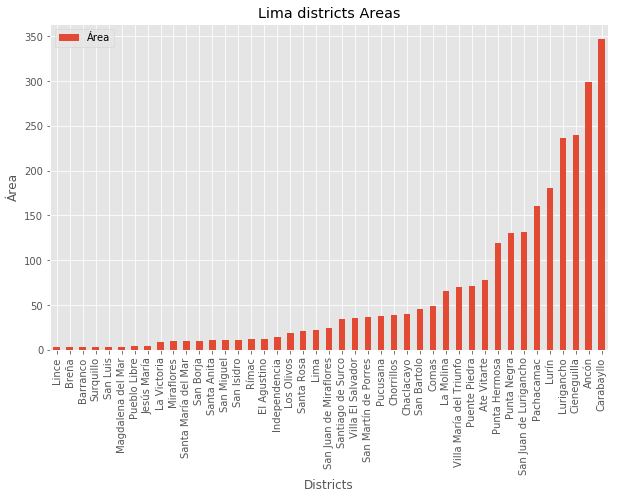

In [19]:
# step 2: plot data
df_gra1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Districts') # add to x-label to the plot
plt.ylabel('Área') # add y-label to the plot
plt.title('Lima districts Areas') # add title to the plot

plt.show()

In [21]:
df_gra2 = df.loc[:,'Distritos':'Población']
df_gra2.drop(columns= 'Área', inplace= True)
df_gra3=df_gra2.sort_values('Población')
df_gra3.tail()

,Distritos,Población
41,Villa El Salvador,367436.0
1,Ate Vitarte,419663.0
8,Comas,464745.0
34,San Martín de Porres,700178.0
31,San Juan de Lurigancho,1091303.0


In [22]:
df_gra3.set_index('Distritos',inplace= True)
df_gra3.head()

,Población
Distritos,
Santa María del Mar,999.0
Punta Negra,4473.0
Punta Hermosa,4676.0
San Bartolo,5733.0
Pucusana,9231.0


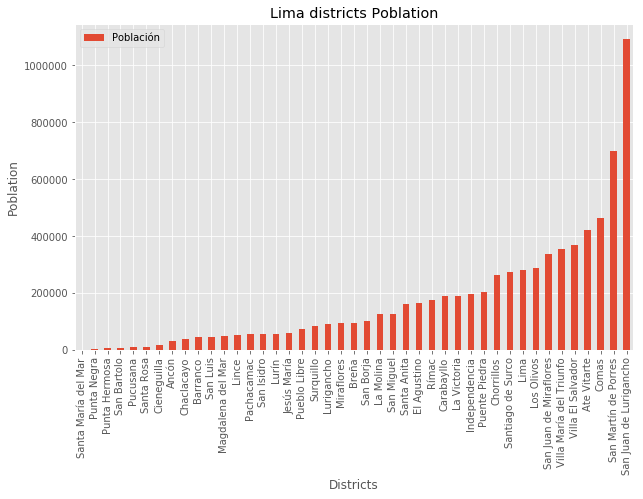

In [23]:
# step 2: plot data
df_gra3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Districts') # add to x-label to the plot
plt.ylabel('Poblation') # add y-label to the plot
plt.title('Lima districts Poblation') # add title to the plot

plt.show()

</div>
 
<hr>

Part 2: Creating Dataframe of District's coordinates

In [24]:
from urllib.request import urlopen as uReq
import requests
import lxml
import pandas as pd
from pandas import DataFrame
import numpy as np

In [25]:
data =  [['Lima01', 'Lima', -14.046071,-75.704294], ['Lima02', 'Ancon', -11.696553,-77.111654],['Lima03', 'Ate Vitarte', -14.046071,-75.704294],
        ['Lima04', 'Barranco', -12.143959,-77.0202268],['Lima05', 'Breña', -12.059700,-77.050118],['Lima06', 'Carabayllo', -11.794993,-76.989292],
        ['Lima07', 'Comas', -11.932861,-77.040674],['Lima08', 'Chaclacayo', -11.992479,-76.776176],['Lima09', 'Chorrillos', -12.192349,-77.008962],
        ['Lima10', 'El Agustino', -12.042052,-76.995714],['Lima11', 'Jesús María', -12.078186,-77.046411],['Lima12', 'La Molina', -12.090176,-76.922337],
        ['Lima13', 'La Victoria', -12.073357,-77.016417],['Lima14', 'Lince', -12.086567,-77.036647],['Lima15', 'Lurigancho', -11.948832,-76.762701],
        ['Lima16', 'Lurin', -12.238049,-76.783862],['Lima17', 'Magdalena del Mar', -12.491734,-75.911147],['Lima18', 'Miraflores', -12.121498,-77.025906],
        ['Lima19', 'Pachacamac', -12.251096,-76.906592],['Lima20', 'Pucusana', -12.482091,-76.797452],['Lima21', 'Pueblo Libre', -12.076638,-77.076638],
        ['Lima22', 'Puente Piedra', -11.876827,-77.074482],['Lima23', 'Punta Negra', -12.365557,-76.795190],['Lima24', 'Punta Hermosa', -12.332678,-76.825698],
        ['Lima25', 'Rimac', -12.020304,-77.035462],['Lima26', 'San Bartolo', -12.387071,-76.777945],['Lima27', 'San Isidro', -12.097902,-77.035366],
        ['Lima28', 'Independencia', -11.989307,-77.047330],['Lima29', 'San Juan de Miraflores', -12.159910,-76.969140],['Lima30', 'San Luis', -12.072355,-76.995890],
        ['Lima31', 'San Martín de Porres', -11.986759,-77.097655],['Lima32', 'San Miguel', -12.078655,-77.095283],['Lima33', 'Santiago de Surco', -12.125104,-76.981919],
        ['Lima34', 'Surquillo', -12.114197,-77.010474],['Lima35', 'Villa  Maria del triunfo', -12.176643,-76.918967],['Lima36', 'San Juan de Lurigancho', -11.948832,-76.762701],
        ['Lima37', 'Santa Maria del Mar', -12.401402,-76.775465],['Lima38', 'Santa Rosa', -12.035851,-77.086616],['Lima39', 'Los Olivos', -11.965985,-77.073071],
        ['Lima40', 'Cieneguilla', -12.073166,-76.777071],['Lima41', 'San Borja', -12.096451,-76.995689],['Lima42', 'Villa El Salvador', -12.213503,-76.937026],
        ['Lima43', 'Santa Anita', -12.223382,-76.847707]]
newdf = pd.DataFrame(data, columns = ['PostCode', 'District', 'Latitude', 'Longitude'])
newdf


,PostCode,District,Latitude,Longitude
0,Lima01,Lima,-14.046071,-75.704294
1,Lima02,Ancon,-11.696553,-77.111654
2,Lima03,Ate Vitarte,-14.046071,-75.704294
3,Lima04,Barranco,-12.143959,-77.020227
4,Lima05,Breña,-12.059700,-77.050118
5,Lima06,Carabayllo,-11.794993,-76.989292
6,Lima07,Comas,-11.932861,-77.040674
7,Lima08,Chaclacayo,-11.992479,-76.776176
8,Lima09,Chorrillos,-12.192349,-77.008962
9,Lima10,El Agustino,-12.042052,-76.995714


In [26]:
print(newdf.size)
print(newdf.shape)

172
(43, 4)


In [27]:
newdf.dtypes

PostCode      object
District      object
Latitude     float64
Longitude    float64
dtype: object

In [28]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [29]:
!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


### Mapping Lima

In [31]:
#mapping Lima
latitude = -12.046374
longitude= -77.042793
# create map of Lima using latitude and longitude values above:
map_lima = folium.Map(location=[latitude, longitude], zoom_start=12)

In [34]:
for lat, lng, label in zip(newdf['Latitude'],newdf['Longitude'], newdf['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lima)  
    
map_lima

### Foursquare API to explore and segment

#### My Foursquare Credentials

In [35]:
CLIENT_ID = 'HYA5PUMBLRHBCJYOIANTFG1QYS3W4DZIYYYFVSVTJNNJQ0XY' # my Foursquare ID
CLIENT_SECRET = '0UYOK4AJCKHACBATY2ABEH2LZ4J1U4LWV5OO0MOCX3R5I14N' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HYA5PUMBLRHBCJYOIANTFG1QYS3W4DZIYYYFVSVTJNNJQ0XY
CLIENT_SECRET:0UYOK4AJCKHACBATY2ABEH2LZ4J1U4LWV5OO0MOCX3R5I14N


In [36]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category' ]
    
    return(nearby_venues)

### Writting the code to run the function on each neighborhood and create a new dataframe called lima_venues.

In [38]:
lima_venues = getNearbyVenues(names=newdf['District'],
                                   latitudes=newdf['Latitude'],
                                   longitudes=newdf['Longitude']
                                    )

Lima
Ancon
Ate Vitarte
Barranco
Breña
Carabayllo
Comas
Chaclacayo
Chorrillos
El Agustino
Jesús María
La Molina
La Victoria
Lince
Lurigancho
Lurin
Magdalena del Mar
Miraflores
Pachacamac
Pucusana
Pueblo Libre
Puente Piedra
Punta Negra
Punta Hermosa
Rimac
San Bartolo
San Isidro
Independencia
San Juan de Miraflores
San Luis
San Martín de Porres
San Miguel
Santiago de Surco
Surquillo
Villa  Maria del triunfo
San Juan de Lurigancho
Santa Maria del Mar
Santa Rosa
Los Olivos
Cieneguilla
San Borja
Villa El Salvador
Santa Anita


In [39]:
print(lima_venues.shape)
lima_venues.head(15)

(709, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lima,-14.046071,-75.704294,Kabannos Pizzeria & Rest,-14.047544,-75.705730,Pizza Place
1,Lima,-14.046071,-75.704294,Restaurante Don Cecilio,-14.046542,-75.700629,Fast Food Restaurant
2,Ate Vitarte,-14.046071,-75.704294,Kabannos Pizzeria & Rest,-14.047544,-75.705730,Pizza Place
3,Ate Vitarte,-14.046071,-75.704294,Restaurante Don Cecilio,-14.046542,-75.700629,Fast Food Restaurant
4,Barranco,-12.143959,-77.020227,FUGA,-12.144419,-77.022005,Nightclub
5,Barranco,-12.143959,-77.020227,Pizerrìa La Linterna,-12.144713,-77.021933,Pizza Place
6,Barranco,-12.143959,-77.020227,Amoramar,-12.144075,-77.018201,Seafood Restaurant
7,Barranco,-12.143959,-77.020227,Sargento Pimienta,-12.143782,-77.018755,Bar
8,Barranco,-12.143959,-77.020227,DaDA,-12.145049,-77.022843,Bar
9,Barranco,-12.143959,-77.020227,Belgicius,-12.141295,-77.021437,Belgian Restaurant


### Number of venues per District

In [40]:
lima_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Ate Vitarte,2,2,2,2,2,2
Barranco,100,100,100,100,100,100
Breña,10,10,10,10,10,10
Carabayllo,1,1,1,1,1,1
Chorrillos,5,5,5,5,5,5
Comas,4,4,4,4,4,4
El Agustino,2,2,2,2,2,2
Jesús María,53,53,53,53,53,53
La Molina,1,1,1,1,1,1


### Number of unique categories

In [43]:
print('The number of unique categories is {}.'.format(len(lima_venues['Venue Category'].unique())))

The number of unique categories is 153.


Sorted by Venue in ascending order showing the greatest

In [44]:
view1=lima_venues.groupby('District').count()
view2=view1.sort_values('Venue')
view2.tail()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Jesús María,53,53,53,53,53,53
Lince,71,71,71,71,71,71
Miraflores,76,76,76,76,76,76
San Isidro,94,94,94,94,94,94
Barranco,100,100,100,100,100,100


### Analyzing district composition

In [45]:
# one hot encoding
lima_onehot = pd.get_dummies(lima_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lima_onehot['District'] = lima_venues['District'] 

# move district column to the first column
cols=list(lima_onehot.columns.values)
cols.pop(cols.index('District'))
lima_onehot=lima_onehot[['District']+cols]

# rename Neighborhood for Districts so that future merge works
lima_onehot.rename(columns = {'District': 'District'}, inplace = True)
lima_onehot.head(15)

,District,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Moving Target,Multiplex,Nail Salon,New American Restaurant,Nightclub,Office,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Restaurant,Road,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Lima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ate Vitarte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ate Vitarte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Barranco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Barranco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [46]:
lima_onehot.shape

(709, 154)

### Grouping rows by district and by the frecuency' mean of each category

In [47]:
lima_grouped = lima_onehot.groupby('District').mean().reset_index()
lima_grouped

,District,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Moving Target,Multiplex,Nail Salon,New American Restaurant,Nightclub,Office,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Restaurant,Road,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Ate Vitarte,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Barranco,0.00,0.000000,0.010000,0.030000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.010000,0.030000,0.100000,0.000000,0.010000,0.000000,0.000000,0.01,0.000000,0.020000,0.010000,0.040000,0.01,0.050000,0.00,0.00,0.040000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.020000,0.01,0.000000,0.010000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.010000,0.000000,0.000000,0.0,0.01,0.000000,0.000000

In [48]:

lima_grouped.shape

(34, 154)

### Printing districts along with the top 5 most common venues

In [49]:
num_top_venues = 5

for hood in lima_grouped['District']:
    print("----"+hood+"----")
    temp = lima_grouped[lima_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ate Vitarte----
                  venue  freq
0  Fast Food Restaurant   0.5
1           Pizza Place   0.5
2   American Restaurant   0.0
3                Office   0.0
4         Movie Theater   0.0


----Barranco----
                venue  freq
0                 Bar  0.10
1  Seafood Restaurant  0.06
2        Burger Joint  0.05
3      Sandwich Place  0.04
4          Restaurant  0.04


----Breña----
                       venue  freq
0                 Restaurant   0.2
1       Fast Food Restaurant   0.2
2  South American Restaurant   0.2
3        Fried Chicken Joint   0.1
4              Grocery Store   0.1


----Carabayllo----
                  venue  freq
0    Chinese Restaurant   1.0
1  Other Great Outdoors   0.0
2         Moving Target   0.0
3             Multiplex   0.0
4            Nail Salon   0.0


----Chorrillos----
            venue  freq
0          Hostel   0.2
1     Gas Station   0.2
2     Beer Garden   0.2
3      Restaurant   0.2
4  Clothing Store   0.2


----Comas----
     

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = lima_grouped['District']

for ind in np.arange(lima_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lima_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ate Vitarte,Pizza Place,Fast Food Restaurant,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Electronics Store
1,Barranco,Bar,Seafood Restaurant,Burger Joint,Café,Pizza Place,Restaurant,Breakfast Spot,Sandwich Place,Peruvian Restaurant,Bakery
2,Breña,Fast Food Restaurant,South American Restaurant,Restaurant,Peruvian Restaurant,Pharmacy,Grocery Store,Fried Chicken Joint,Electronics Store,Farmers Market,Farm
3,Carabayllo,Chinese Restaurant,Yoga Studio,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
4,Chorrillos,Hostel,Beer Garden,Clothing Store,Restaurant,Gas Station,Falafel Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
5,Comas,Department Store,Park,Shopping Mall,Movie Theater,Yoga Studio,Falafel Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
6,El Agustino,Fried Chicken Joint,Café,Yoga Studio,Falafel Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Event Space
7,Jesús María,Peruvian Restaurant,Seafood Restaurant,Park,BBQ Joint,Burger Joint,Restaurant,Boutique,Sandwich Place,Chinese Restaurant,Café
8,La Molina,Park,Yoga Studio,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
9,La Victoria,BBQ Joint,Bus Stop,Furniture / Home Store,Clothing Store,Yoga Studio,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


### Clustering districts

Using KMeans library and creating labels

In [52]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [53]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,2:3]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.70109223],
       [ 1.20415246],
       [-0.62052148],
       [-0.38185082],
       [ 0.07686006],
       [-0.6509668 ],
       [ 0.43731691],
       [-0.76766087],
       [ 1.42425127],
       [-0.03708533],
       [ 0.11857348],
       [-0.55868368],
       [-0.23704512],
       [ 0.08395877],
       [ 0.5164523 ],
       [-0.59024703],
       [ 0.55426485],
       [-0.40242436],
       [-0.57154825],
       [-0.60820372],
       [-0.39158102],
       [-0.57735805],
       [-0.79965385],
       [-0.49373105],
       [ 0.14867217],
       [-0.82189222],
       [-0.8228833 ],
       [ 0.0135332 ],
       [-0.81673174],
       [-0.3430179 ],
       [-0.57469238],
       [ 4.48322541],
       [ 0.79196883],
       [-0.61888106],
       [ 2.57367951],
       [-0.23491648],
       [-0.05977774],
       [-0.83984402],
       [-0.79893129],
       [ 0.4866026 ],
       [-0.43363131],
       [ 0.94917041],
       [ 0.89217086]])

In [54]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
lima_merged= newdf
lima_merged['Cluster Labels'] = labels
lima_merged = lima_merged.join(districts_venues_sorted.set_index('District'), on='District')
print(labels)

[0 2 0 0 3 0 3 0 2 3 3 0 0 3 3 0 3 0 0 0 0 0 0 0 3 0 0 3 0 0 0 1 2 0 4 0 3
 0 0 3 0 2 2]


In [55]:
lima_merged.head()

,PostCode,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lima01,Lima,-14.046071,-75.704294,0,Pizza Place,Fast Food Restaurant,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Electronics Store
1,Lima02,Ancon,-11.696553,-77.111654,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lima03,Ate Vitarte,-14.046071,-75.704294,0,Pizza Place,Fast Food Restaurant,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Electronics Store
3,Lima04,Barranco,-12.143959,-77.020227,0,Bar,Seafood Restaurant,Burger Joint,Café,Pizza Place,Restaurant,Breakfast Spot,Sandwich Place,Peruvian Restaurant,Bakery
4,Lima05,Breña,-12.059700,-77.050118,3,Fast Food Restaurant,South American Restaurant,Restaurant,Peruvian Restaurant,Pharmacy,Grocery Store,Fried Chicken Joint,Electronics Store,Farmers Market,Farm


### Clusters visualization of Lima's Districts

In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i+x+(i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lima_merged['Latitude'], lima_merged['Longitude'], lima_merged['District'], lima_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 0 - Most common venues: Hotel, Seafood Restaurant, Peruvian Restaurant and Fast Food Restaurant

In [57]:
lima_merged.loc[lima_merged['Cluster Labels'] == 0, lima_merged.columns[[0] + list(range(5, lima_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lima01,Pizza Place,Fast Food Restaurant,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Electronics Store
2,Lima03,Pizza Place,Fast Food Restaurant,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Electronics Store
3,Lima04,Bar,Seafood Restaurant,Burger Joint,Café,Pizza Place,Restaurant,Breakfast Spot,Sandwich Place,Peruvian Restaurant,Bakery
5,Lima06,Chinese Restaurant,Yoga Studio,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
7,Lima08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Lima12,Park,Yoga Studio,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
12,Lima13,BBQ Joint,Bus Stop,Furniture / Home Store,Clothing Store,Yoga Studio,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
15,Lima16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Lima18,Hotel,Seafood Restaurant,Coffee Shop,Café,Bar,Sandwich Place,Cocktail Bar,Peruvian Restaurant,Ice Cream Shop,Bookstore
18,Lima19,Farm,History Museum,Yoga Studio,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


#### Cluster 1 - Most common venues: Pharmacy and Event Space

In [56]:
lima_merged.loc[lima_merged['Cluster Labels'] == 1, lima_merged.columns[[0] + list(range(5, lima_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Lima35,Pharmacy,Event Space,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Electronics Store


#### Cluster 2 - Most common venues: Fast Food Restaurant, Peruvian Restaurant and Department Store

In [57]:
lima_merged.loc[lima_merged['Cluster Labels'] == 2, lima_merged.columns[[0] + list(range(5, lima_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lima05,Fast Food Restaurant,South American Restaurant,Restaurant,Peruvian Restaurant,Pharmacy,Grocery Store,Fried Chicken Joint,Electronics Store,Farmers Market,Farm
6,Lima07,Department Store,Park,Shopping Mall,Movie Theater,Yoga Studio,Falafel Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
9,Lima10,Fried Chicken Joint,Café,Yoga Studio,Falafel Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Event Space
10,Lima11,Peruvian Restaurant,Seafood Restaurant,Park,BBQ Joint,Burger Joint,Restaurant,Boutique,Sandwich Place,Chinese Restaurant,Café
13,Lima14,Seafood Restaurant,Chinese Restaurant,Nightclub,Fried Chicken Joint,Restaurant,Bar,Peruvian Restaurant,Vegetarian / Vegan Restaurant,Burger Joint,Spa
14,Lima15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Lima17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Lima25,American Restaurant,Seafood Restaurant,Soccer Field,Pizza Place,Dance Studio,Falafel Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
27,Lima28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Lima37,Beach,Campground,Pool,Italian Restaurant,Yoga Studio,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


#### Cluster 3 - Most common venues: Seafood Restaurant and Chinese Restaurant

In [58]:
lima_merged.loc[lima_merged['Cluster Labels'] == 3, lima_merged.columns[[0] + list(range(5, lima_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Lima32,Seafood Restaurant,Chinese Restaurant,Dance Studio,Pizza Place,Playground,Sandwich Place,Restaurant,Martial Arts Dojo,Soccer Field,Soccer Stadium


#### Cluster 4 - Most common venues: Hostel, Bar and Chinese Restaurant 

In [59]:
lima_merged.loc[lima_merged['Cluster Labels'] == 4, lima_merged.columns[[0] + list(range(5, lima_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Lima02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Lima09,Hostel,Beer Garden,Clothing Store,Restaurant,Gas Station,Falafel Restaurant,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
32,Lima33,Park,Chinese Restaurant,Bakery,BBQ Joint,Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Italian Restaurant,Fried Chicken Joint,Ice Cream Shop
41,Lima42,Bar,Pizza Place,Dive Bar,Food,Market,Gym,Electronics Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
42,Lima43,Park,Moving Target,Yoga Studio,Event Space,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


## 4.- Results

<a href="http://www.cementosinka.com.pe/blog/lima-una-ciudad-cementos-inka/"><img src = "http://www.cementosinka.com.pe/blog/wp-content/uploads/2016/12/Lima-una-ciudad-para-Cementos-Inka.png" width = 400> </a>

### 1.- The most common business in Lima is Restaurants. It seams that there is an important proportion in income spend related to feeding.  
### 2.- CLusters number 0 and 2 are the most concentrated in terms of competitors.  
### 3.- The predominance of restaurants and hotels might be related to hight transit of turists.  

## 5.- Discussions and Recommendations

### In order to get more accuracy in our analysis, I strongly recommend to incorporate correlation among demographic factors such as income level, age, gender and education level. By analyzing those factors we can stablish with more certainty that the cluster N°1 is the best.

## 6.- Conclusions

###  1.-We can conclude that the cluster N°0 is the hot zone in which any investor can find attractive to start a new business. 
### 2.-There is no correlation between population density and size of area in Lima's districts.
### 3.-The cluster N° 01 is located very close to the center of the city and is mainly represented by restaurants. We can find that the majority of businesses are related to seafood restaurants and hotels. That evidence might be correlated with the transit of tourist in that zone. Because of that, i reccomend investors to fund peruvian typical food in the cluster N°0.
### 4.-In the whole market, we have perceived that investing in a restaurant is common activity in Lima. That evidence would suggest that this sector is profitable and is not completely developed.  



## 7.- G.References

[1] Lima districts — Wikipedia  
[2] Google Map   
[3] Forsquare API  
[4] Antipodas Coordinates  
